# Практическое задание курса Light Auto ML. Часть 1 -  EDA

<details>
<summary>Описание задания</summary>

Основная задача - выбрать и решить соревнование с платформы Kaggle.com  (http://kaggle.com/) , используя два подхода:
1. Подготовить базовое решение (бейзлайн) с помощью Light Auto ML (LAMA)
2. Реализовать альтернативное решение без использования LAMA

Требования к выбору соревнования
- Можно выбрать как текущие, так и прошедшие денежные соревнования
- Другие типы соревнований необходимо согласовать с куратором курса
- Нельзя использовать простые соревнования типа Titanic

Цели проекта
- Превзойти результаты бейзлайна на LAMA
- Продемонстрировать качественный код
- Использовать стандартные подходы к организации кода (например, Pipeline)
- Провести качественный EDA
- Предоставить подробное описание и обоснование гипотез

Критерии оценки
1. Анализ целевой переменной (максимум 1 балл)
[0.5] Численный анализ:
Для регрессии: распределение таргета, поиск аномальных значений
Для классификации: распределение количества классов
[0.5] Визуализация статистик:
- Изолированный анализ
- Анализ во временном контексте

2. Анализ признаков (максимум 4 балла)
[0.5] Типизация признаков (числовые, категориальные, временные) и их распределения
[0.5] Выявление аномальных значений
[0.5] Анализ зависимостей между признаками
[0.5] Анализ пропущенных значений
[0.5] Определение важности признаков (корреляции с таргетом)
[1.0] Графическая визуализация минимум 3-х пунктов выше
[0.5] Анализ возможных преобразований и генерации новых признаков

3. Моделирование (максимум 3.5 балла)
[0.25] Обоснование стратегии разделения данных (train-test split)
Особое внимание уделить предотвращению утечки данных
[0.25] LAMA бейзлайн:
- Минимум 2 различные конфигурации
- Выбор лучшего решения
[3.0] Собственное решение (если не удалось побить LLama baseline: 3 x 1.0 балл за различные пайплайны/попытки):
- Выбор модели
- Построение пайплайна (препроцессинг, обработка пропусков, генерация признаков, отбор признаков, финальная модель/ансамбль)
- Оптимизация гиперпараметров

4. Общие требования к коду (максимум 1.5 балла)
[0.5] Чистый код:
- Оформление ноутбука
- Соответствие PEP 8
- Правильное именование переменных и функций
- Документирование функций
[0.5] Качество кода:
- Следование принципам SOLID
- Отсутствие спагетти-кода
- Обработка предупреждений и ошибок
- Логгирование
[0.5] Структура решения:
- Оформление в виде self-contained pipeline
- Использование стандартных инструментов (например, sklearn pipeline)

Итоговая оценка
Максимальный балл: 10
9-10 баллов: оценка 5А
7-8.5 баллов: оценка 4В
5-6.5 баллов: оценка 3D
Менее 5 баллов: требуется пересдача

Ожидания
Работа должна представлять собой мини-исследование с:
1) Проработкой и проверкой гипотез
2) Оценкой результатов
3) Обоснованием выбора пайплайна
4) Документированием процесса исследования

</details>

##

#### **Описание соревнования - "Google Brain - Ventilator Pressure Prediction"**

**Задача:** Симуляция работы вентилятора легких с учетом индивидуальных характеристик пациента.

Механическая вентиляция легких - ресурсоемкая процедура, что особенно проявилось во время пандемии COVID-19. Разработка новых методов управления вентиляторами требует дорогостоящих клинических испытаний. Качественные симуляторы могут значительно снизить этот барьер.

**Цель:** Предсказать давление в дыхательных путях пациента, учитывая параметры легких:
- **Compliance (C)** - растяжимость легких
- **Resistance (R)** - сопротивление дыхательных путей

**Метрика качества**: **Mean Absolute Error (MAE)** на фазе вдоха:

$$
MAE = mean(|X - Y|)
$$

где X = предсказанные значения давления, Y = фактические значения давления

- Оценивается только фаза вдоха (inspiratory phase), выдох не учитывается.
- [Соревнование](https://www.kaggle.com/competitions/ventilator-pressure-prediction)

#### **Импорт нужных библиотек**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **Загрузка датасета**

In [2]:
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')
sample = pd.read_csv('./data/sample_submission.csv')

print(f"Размер тренировочной выборки: {train.shape}")
print(f"Размер тестовой выборки: {test.shape}")
print(f"Размер sample выборки: {sample.shape}")

Размер тренировочной выборки: (6036000, 8)
Размер тестовой выборки: (4024000, 7)
Размер sample выборки: (4024000, 2)


In [3]:
# Смотрим первые 10 строк
display(test.head(10))

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
5,6,0,5,20,0.159557,30.486938,0
6,7,0,5,20,0.191471,33.545950,0
7,8,0,5,20,0.223402,35.717600,0
8,9,0,5,20,0.255337,36.971061,0
9,10,0,5,20,0.287230,37.542219,0


In [4]:
display(train)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [5]:
# Информация о столбцах и типах данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [6]:
train.describe().round(3)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6036000.000,6036000.000,6036000.000,6036000.000,6036000.000,6036000.000,6036000.000,6036000.000
mean,3018000.500,62838.859,27.036,26.081,1.307,7.322,0.620,11.220
std,1742443.257,36335.256,19.595,17.152,0.766,13.435,0.485,8.110
min,1.000,1.000,5.000,10.000,0.000,0.000,0.000,-1.896
25%,1509000.750,31377.000,5.000,10.000,0.643,0.394,0.000,6.330
50%,3018000.500,62765.500,20.000,20.000,1.308,4.386,1.000,7.033
75%,4527000.250,94301.000,50.000,50.000,1.966,4.984,1.000,13.641
max,6036000.000,125749.000,50.000,50.000,2.937,100.000,1.000,64.821


Краткое описание стоблцов (взято с kaggle):

| Признак | Описание | Единицы измерения |
|---------|----------|-------------------|
| `id` | Уникальный идентификатор временного шага | - |
| `breath_id` | Уникальный идентификатор цикла дыхания | - |
| `R` | Сопротивление дыхательных путей (resistance) | cmH2O/L/S |
| `C` | Растяжимость легких (compliance) | mL/cmH2O |
| `time_step` | Временная метка в цикле дыхания | секунды |
| `u_in` | Управляющий сигнал клапана вдоха | 0-100 |
| `u_out` | Управляющий сигнал клапана выдоха | 0 или 1 |
| `pressure` | **Целевая переменная** - давление в дыхательных путях | cmH2O |

**Физическая интерпретация:**
- **R** ↑ → труднее вдыхать (как дуть в шарик через узкую трубочку)
- **C** ↑ → легче растягиваются легкие (как тонкий латекс шарика)

## EDA
### 1. Анализ целевой переменной (максимум 1 балл)

Суть:
- [0.5] Численный анализ:
    - Для регрессии: распределение таргета, поиск аномальных значений
    - Для классификации: распределение количества классов

- [0.5] Визуализация статистик:
    - Изолированный анализ
    - Анализ во временном контексте

Целевая переменная – это pressure (давление в дыхательных путях)

In [7]:
print("Основные статистики:")
print(train['pressure'].describe().round(3))

# Дополнительные метрики
print("\nДополнительные статистики:")
print(f"Асимметрия (Skewness): {train['pressure'].skew():.4f}")
print(f"Количество пропусков: {train['pressure'].isna().sum()}")
print(f"Количество уникальных значений: {train['pressure'].nunique()}")

Основные статистики:
count    6036000.000
mean          11.220
std            8.110
min           -1.896
25%            6.330
50%            7.033
75%           13.641
max           64.821
Name: pressure, dtype: float64

Дополнительные статистики:
Асимметрия (Skewness): 1.8190
Количество пропусков: 0
Количество уникальных значений: 950


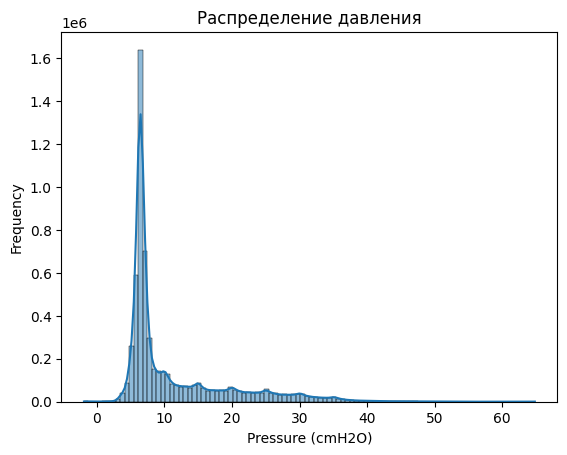

In [8]:
# Визуализация распределения давления
sns.histplot(train['pressure'], kde=True, bins=100)
plt.xlabel('Pressure (cmH2O)')
plt.ylabel('Frequency')
plt.title('Распределение давления')
plt.show()

In [9]:
# Рассмотрим аномальные значения давления
# Выбросы (метод IQR)
Q1, Q3 = train['pressure'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train[(train['pressure'] < lower_bound) | (train['pressure'] > upper_bound)]

print(f"Аномальные значения:")
print(f"Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Выбросы: {len(outliers)} ({len(outliers)/len(train)*100:.2f}% от общего кол-ва)")
print(f"Минимум: {train['pressure'].min():.2f} (отрицательные значения!)")

Аномальные значения:
Границы: [-4.64, 24.61]
Выбросы: 594709 (9.85% от общего кол-ва)
Минимум: -1.90 (отрицательные значения!)


/Users/anastasia/docs/Projects/ventilator-pressure-prediction/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


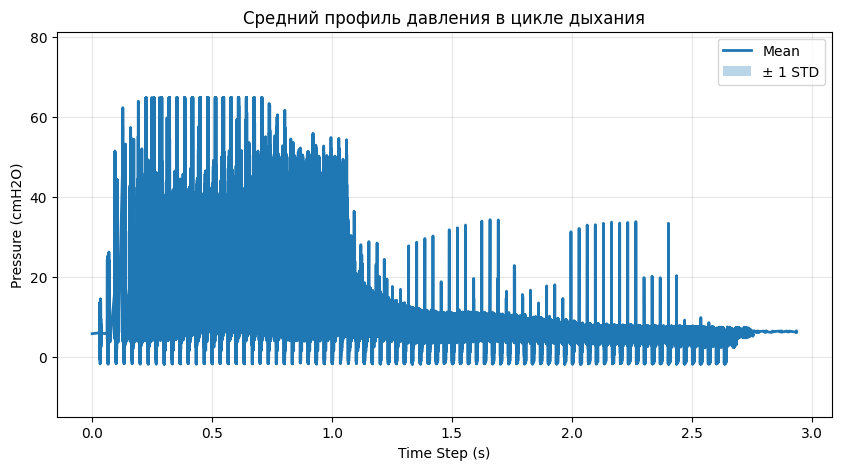

In [10]:
# Средний профиль давления во времени
avg_profile = train.groupby('time_step')['pressure'].agg(['mean', 'std'])

plt.figure(figsize=(10, 5))
plt.plot(avg_profile.index, avg_profile['mean'], linewidth=2, label='Mean')
plt.fill_between(avg_profile.index, 
                 avg_profile['mean'] - avg_profile['std'],
                 avg_profile['mean'] + avg_profile['std'],
                 alpha=0.3, label='± 1 STD')
plt.xlabel('Time Step (s)')
plt.ylabel('Pressure (cmH2O)')
plt.title('Средний профиль давления в цикле дыхания')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#### ``Выводы по целевой переменной pressure``

**Распределение:**
- Сильная асимметрия (1.82) - большинство значений в диапазоне 6-14 cmH2O
- Среднее (11.2) > медиана (7.0) из-за правого хвоста
- Диапазон: -1.90 до 64.82 cmH2O

**Аномалии:**
- 9.85% выбросов по методу IQR
- Присутствуют отрицательные значения (требуют внимания)

**Временная структура:**
- Четкий циклический паттерн вдох-выдох
- Вдох (0-1 сек): резкий рост до ~65 cmH2O
- Выдох (1-3 сек): плавное снижение до ~7 cmH2O
- Высокая вариативность на фазе вдоха из-за различий в R и C

---


### 2. Анализ признаков (максимум 4 балла)
- [0.5] Типизация признаков (числовые, категориальные, временные) и их распределения
- [0.5] Выявление аномальных значений
- [0.5] Анализ зависимостей между признаками
- [0.5] Анализ пропущенных значений
- [0.5] Определение важности признаков (корреляции с таргетом)
- [1.0] Графическая визуализация минимум 3-х пунктов выше (**реализуем для каждого пункта**)
- [0.5] Анализ возможных преобразований и генерации новых признаков


##### 2.1 Типизация признаков (числовые, категориальные, временные) и их распределения

Рассмотрим типы признаков:

In [11]:
# Определим типы
print("Типы признаков:")
print(train.dtypes)

Типы признаков:
id             int64
breath_id      int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
pressure     float64
dtype: object


In [12]:
# Числовые vs Категориальные
numerical_features = []
categorical_features = []

for col in train.columns:
    if col in ['id', 'breath_id', 'pressure']:
        continue
    
    n_unique = train[col].nunique()
    
    if n_unique <= 10:
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print(f"Итого:")
print(f"   Категориальные: {categorical_features}")
print(f"   Числовые: {numerical_features}")
print(f"   Идентификаторы: ['id', 'breath_id']")
print(f"   Целевая переменная: ['pressure']")

# Уникальные значения
print("\nУникальные значения:")
for col in train.columns:
    if col != 'id':
        print(f"{col}: {train[col].nunique()} уникальных значений")

Итого:
   Категориальные: ['R', 'C', 'u_out']
   Числовые: ['time_step', 'u_in']
   Идентификаторы: ['id', 'breath_id']
   Целевая переменная: ['pressure']

Уникальные значения:
breath_id: 75450 уникальных значений
R: 3 уникальных значений
C: 3 уникальных значений
time_step: 3767571 уникальных значений
u_in: 4020311 уникальных значений
u_out: 2 уникальных значений
pressure: 950 уникальных значений


Рассмотрим более явно распределение признаков на гистограммах

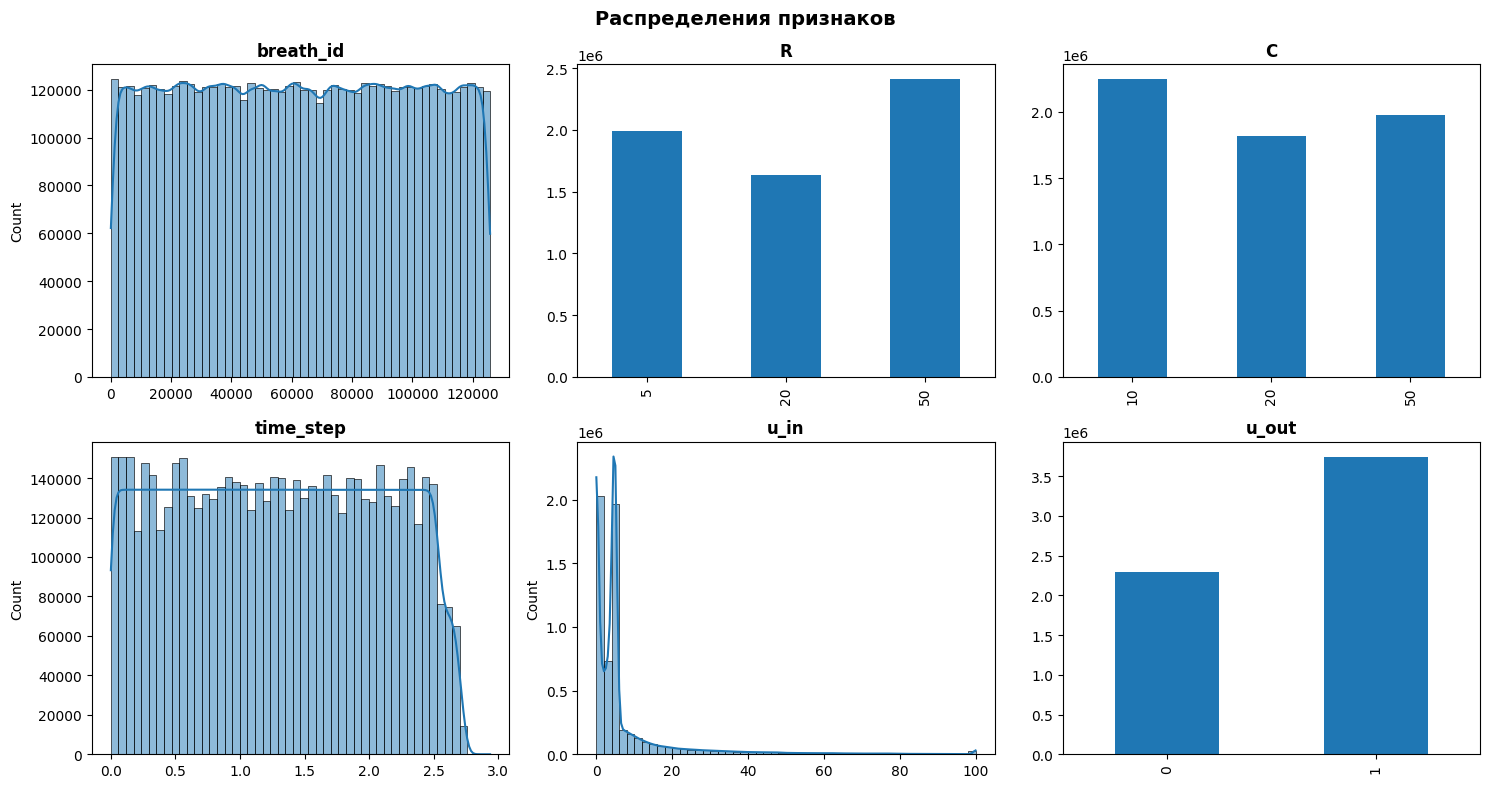

In [13]:
# Распределения признаков
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Распределения признаков', fontsize=14, fontweight='bold')

features = ['breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    
    if feature in ['R', 'C', 'u_out']:
        # Для категориальных - bar plot
        train[feature].value_counts().sort_index().plot(kind='bar', ax=axes[row, col])
    else:
        # Для непрерывных - histogram
        sns.histplot(train[feature], bins=50, ax=axes[row, col], kde=True)
    
    axes[row, col].set_title(feature, fontweight='bold')
    axes[row, col].set_xlabel('')

plt.tight_layout()
plt.show()

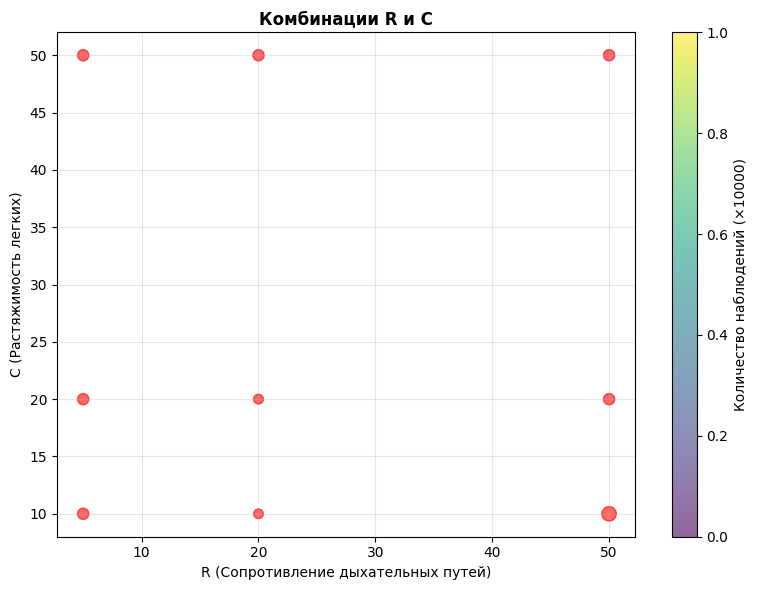

In [14]:
# Комбинация R и C
rc_combinations = train.groupby(['R', 'C']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
scatter = plt.scatter(rc_combinations['R'], rc_combinations['C'],
                     s=rc_combinations['count']/10000, alpha=0.6, color='red')
plt.title('Комбинации R и C', fontweight='bold')
plt.xlabel('R (Сопротивление дыхательных путей)')
plt.ylabel('C (Растяжимость легких)')
cbar = plt.colorbar(scatter)
cbar.set_label('Количество наблюдений (×10000)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 2.2 Анализ пропущенных значений

**Результат:** Пропущенные значения полностью отсутствуют (0% во всех признаках)

Возможно, это связанно с тем, что для этого соревнования данные отбирались и организаторы специально отфильтровали NaN пропуски, тогда перейдем к аномалиям

In [15]:
# Проверка на пропущенные значения
print("Пропущенные значения в датасете:")
print("-" * 40)

missing = train.isnull().sum()
missing_percent = (missing / len(train)) * 100

missing_df = pd.DataFrame({
    'Признак': missing.index,
    'Пропусков': missing.values,
    'Процент': missing_percent.values
})

print(missing_df.to_string(index=False))

if missing.sum() == 0:
    print("\nПропущенные значения отсутствуют!")

Пропущенные значения в датасете:
----------------------------------------
  Признак  Пропусков  Процент
       id          0      0.0
breath_id          0      0.0
        R          0      0.0
        C          0      0.0
time_step          0      0.0
     u_in          0      0.0
    u_out          0      0.0
 pressure          0      0.0

Пропущенные значения отсутствуют!


##### 2.3 Выявление аномальных значений

Далее изучаем распределения числовых признаков, а именно признаков – time_step, u_in и pressure, чтобы найти возможные аномалии и сильные выбросы.

Cтроим боксплоты для числовых колонок небольшими группами, чтобы визуально заметить "хвосты" и подозрительно большие значения

pressure (целевая переменная):
  Выбросов (IQR): 594709 (9.85%)
  Отрицательные значения: 3713

 u_in (управляющий сигнал):
  Диапазон: [0.00, 100.00]
  Выбросов (IQR): 836873 (13.86%)

 time_step (временная структура):
  Длина циклов: 80-80 шагов
  Все одинаковой длины: Да


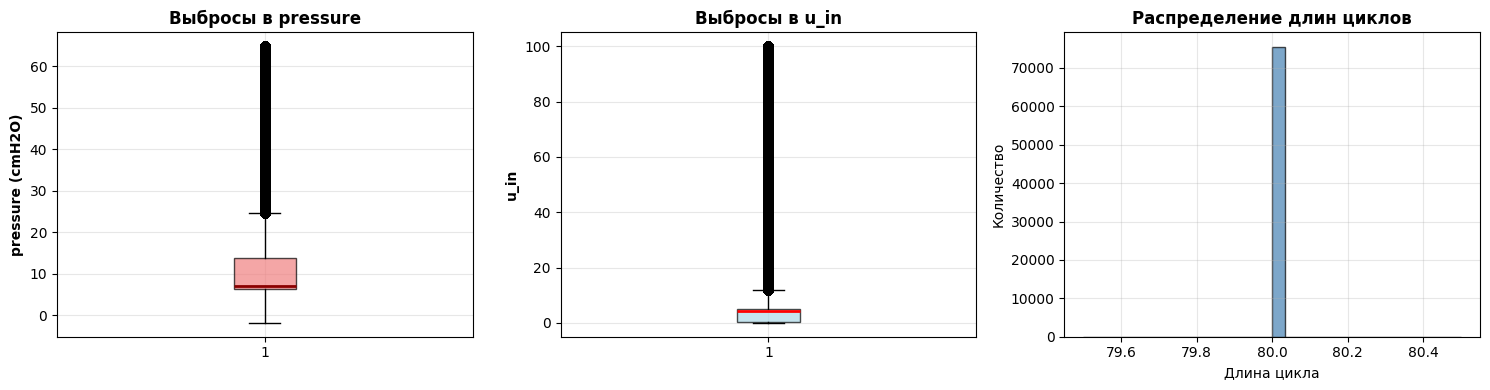

In [16]:
# 1. pressure - целевая переменная
print("pressure (целевая переменная):")
Q1, Q3 = train['pressure'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers_pressure = train[(train['pressure'] < Q1-1.5*IQR) | (train['pressure'] > Q3+1.5*IQR)]
print(f"  Выбросов (IQR): {len(outliers_pressure)} ({len(outliers_pressure)/len(train)*100:.2f}%)")
print(f"  Отрицательные значения: {len(train[train['pressure'] < 0])}")

# 2. u_in - управляющий сигнал
print("\n u_in (управляющий сигнал):")
print(f"  Диапазон: [{train['u_in'].min():.2f}, {train['u_in'].max():.2f}]")
Q1, Q3 = train['u_in'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers_u_in = train[(train['u_in'] < Q1-1.5*IQR) | (train['u_in'] > Q3+1.5*IQR)]
print(f"  Выбросов (IQR): {len(outliers_u_in)} ({len(outliers_u_in)/len(train)*100:.2f}%)")

# 3. time_step - временная структура
print("\n time_step (временная структура):")
breath_lengths = train.groupby('breath_id').size()
print(f"  Длина циклов: {breath_lengths.min()}-{breath_lengths.max()} шагов")
print(f"  Все одинаковой длины: {'Да' if breath_lengths.nunique() == 1 else 'Нет'}")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Box plot: pressure
axes[0].boxplot(train['pressure'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7),
                medianprops=dict(color='darkred', linewidth=2))
axes[0].set_ylabel('pressure (cmH2O)', fontweight='bold')
axes[0].set_title('Выбросы в pressure', fontweight='bold')
axes[0].grid(alpha=0.3)

# Box plot: u_in
axes[1].boxplot(train['u_in'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('u_in', fontweight='bold')
axes[1].set_title('Выбросы в u_in', fontweight='bold')
axes[1].grid(alpha=0.3)

# Длины циклов
axes[2].hist(breath_lengths, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Длина цикла')
axes[2].set_ylabel('Количество')
axes[2].set_title('Распределение длин циклов', fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

``Выводы по аномальным значениям``

**Результаты анализа:**
- **pressure:** 9.85% выбросов (594,709 записей), включая 3,713 отрицательных значений
- **u_in:** 13.86% выбросов (836,873 записей) в допустимом диапазоне [0, 100]
- **time_step:** все циклы дыхания имеют строго 80 шагов - идеальная структура данных

**Решение:**
- **u_in:** выбросы по методу IQR не являются аномалиями - это нормальные режимы работы клапана в диапазоне [0, 100]. Оставляем без изменений.
- **time_step:** отсутствуют аномалии в временной структуре, все циклы одинаковой длины.
- **pressure:** выбросы в целевой переменной отражают реальную вариативность давления при различных режимах вентиляции. Согласно лучшим практикам Kaggle решений, **не удаляем выбросы**.

**Возможные варианты для моделирования:** 
Использовать RobustScaler при нормализации данных, так как он устойчив к выбросам и не требует их предварительного удаления.

##### 2.4 - 2.5 Анализ зависимостей между признаками и Определение важности признаков

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")

In [18]:
# Корреляция с таргетом 
FEATURES = ['R', 'C', 'time_step', 'u_in', 'u_out']
TARGET = 'pressure'

corr = (
    train[FEATURES + [TARGET]]
    .corr()[TARGET]
    .drop(TARGET)
    .sort_values(ascending=False)
)

display(corr.to_frame("corr_with_pressure"))

,corr_with_pressure
u_in,0.308136
R,0.015976
C,-0.036727
time_step,-0.524829
u_out,-0.614910


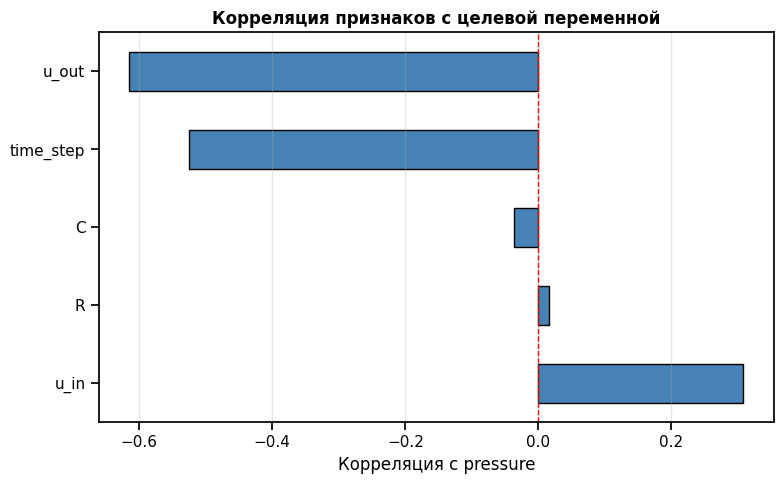

In [19]:
# График
plt.figure(figsize=(8, 5))
corr.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Корреляция с pressure')
plt.title('Корреляция признаков с целевой переменной', fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [27]:
# Корреляция внутри одного дыхательного цикла
def breath_corr(df, breath_id):
    cols = ['time_step', 'u_in', 'pressure']
    return df.loc[df.breath_id == breath_id, cols].corr()['pressure']

example_breath_id = train.breath_id.iloc[0]
corr_breath = breath_corr(train, example_breath_id).drop('pressure')

print("Корреляция внутри одного цикла дыхания:")
display(corr_breath.to_frame("corr_with_pressure"))

Корреляция внутри одного цикла дыхания:


,corr_with_pressure
time_step,-0.686707
u_in,0.755983


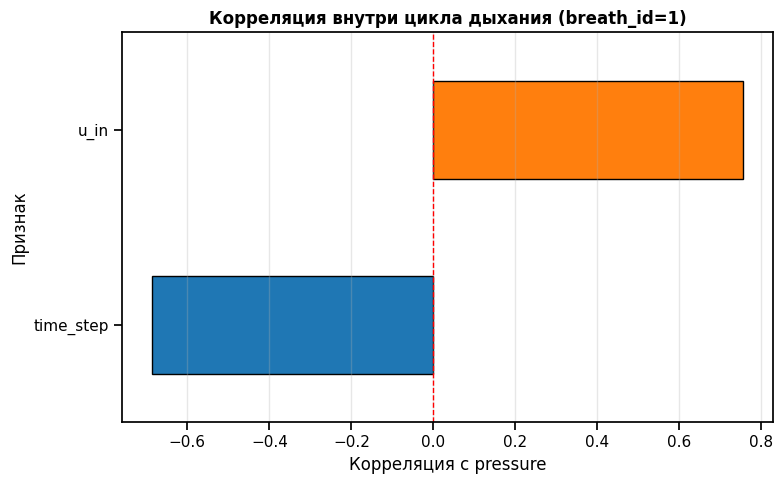

In [21]:
# График
plt.figure(figsize=(8, 5))
corr_breath.plot(kind='barh', color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.xlabel('Корреляция с pressure')
plt.ylabel('Признак')
plt.title(f'Корреляция внутри цикла дыхания (breath_id={example_breath_id})', fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

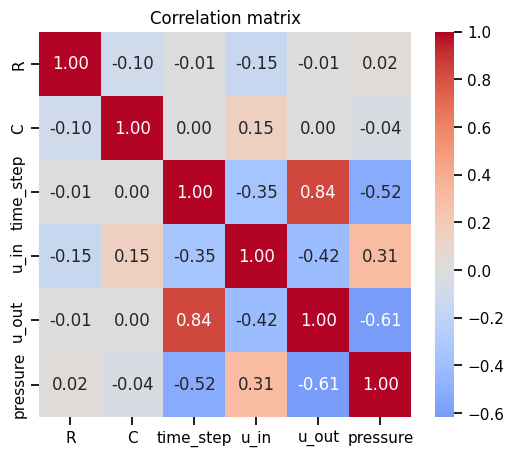

In [22]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    train[FEATURES + [TARGET]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation matrix")
plt.show()

``Вывод по корреляциям:``

**Корреляции с целевой переменной (pressure):**
- **u_out (-0.64)** - сильнейшая связь: открытый выпускной клапан → низкое давление
- **time_step (-0.52)** - давление падает со временем в цикле
- **u_in (+0.31)** - степень открытия впускного клапана повышает давление
- **R, C (~0.02)** - параметры легких имеют слабую линейную корреляцию

**Взаимосвязи между признаками:**
- **time_step ↔ u_out (+0.84)** - фаза дыхания жестко связана со временем
- **u_in ↔ u_out (-0.42)** - клапаны работают в противофазе (вдох/выдох)

**Корреляции внутри циклов дыхания:**
Внутри отдельных breath_id корреляции усиливаются в 2-3 раза:
- **u_in (+0.75)** vs (+0.31) глобально
- **time_step (-0.71)** vs (-0.52) глобально

**Ключевые выводы:**
1. Управляющие сигналы клапанов (u_in, u_out) - основные драйверы давления
2. Временная структура критически важна - зависимости внутри циклов намного сильнее
3. R и C влияют нелинейно, требуются признаки-взаимодействия (R×C)
4. Для эффективного моделирования необходимо учитывать последовательность внутри breath_id

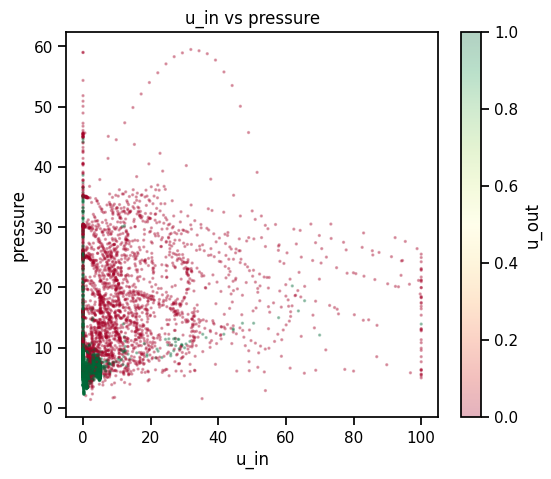

In [23]:
sample = train[train.breath_id.isin(train.breath_id.unique()[:100])]

plt.figure(figsize=(6, 5))
sc = plt.scatter(
    sample.u_in,
    sample.pressure,
    c=sample.u_out,
    s=2,
    alpha=0.3,
    cmap="RdYlGn"
)
plt.colorbar(sc, label="u_out")
plt.xlabel("u_in")
plt.ylabel("pressure")
plt.title("u_in vs pressure")
plt.show()

u_out - ключевой признак для разделения режимов. Зависимость u_in -> pressure сложная и требует учета других факторов (R×C, временной позиции).

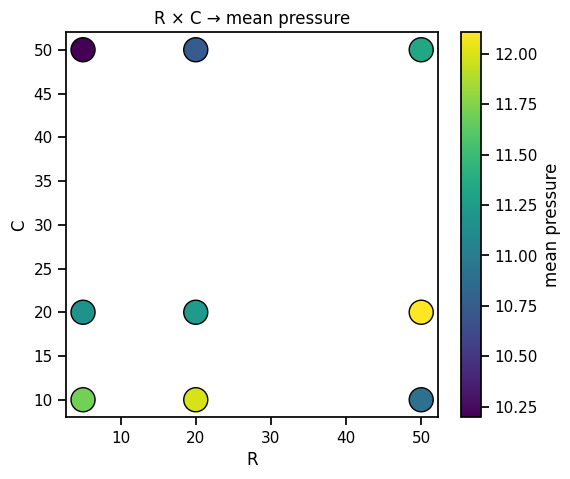

In [29]:
# Среднее давление в зависимости от R и C
rc_mean = (
    train
    .groupby(['R', 'C'], as_index=False)['pressure']
    .mean()
)

plt.figure(figsize=(6, 5))
sc = plt.scatter(
    rc_mean.R,
    rc_mean.C,
    c=rc_mean.pressure,
    s=300,
    edgecolors="black"
)
plt.colorbar(sc, label="mean pressure")
plt.xlabel("R")
plt.ylabel("C")
plt.title("R × C → mean pressure")
plt.show()

Хотя линейная корреляция R, C с pressure слабая (~0.02), их комбинации R×C определяют базовый уровень давления. Параметр C (растяжимость) влияет сильнее, чем R (сопротивление). Это подтверждает необходимость создания признака R×C для моделирования.

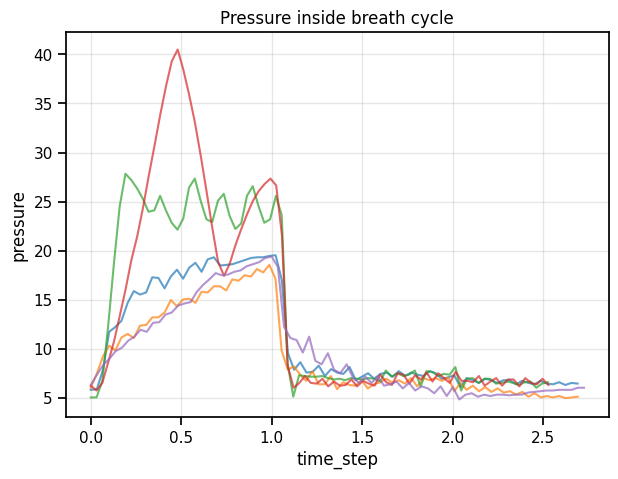

In [25]:
# Как управляющий сигнал (u_in) связан с давлением, с учётом фаз дыхания
plt.figure(figsize=(7, 5))

for bid in train.breath_id.unique()[:5]:
    d = train[train.breath_id == bid]
    plt.plot(d.time_step, d.pressure, alpha=0.7)

plt.xlabel("time_step")
plt.ylabel("pressure")
plt.title("Pressure inside breath cycle")
plt.grid(alpha=0.3)
plt.show()

Сильная временная зависимость - давление в текущий момент зависит от предыдущих значений. Разные циклы имеют схожую форму (вдох-выдох), но отличаются амплитудой из-за параметров R, C и управляющих сигналов.

Это подтверждает необходимость lag-признаков и использования LSTM/временных моделей.

##### **2.6 Генерации новых признаков**

Исходя из анализа пунктов выше, можно сформулировать стек добавочных признаков:

**1. Lag-признаки**
- `u_in_lag_1/2/3` - предыдущие значения управляющего сигнала
- так как корреляция внутри циклов в 2-3 раза сильнее глобальной

**2. Difference признаки**
- `u_in_diff` - скорость изменения управляющего сигнала
- динамика изменений критична для временных моделей

**3. Cumulative sum**
- `u_in_cumsum` - накопленный объем воздуха
-  физический смысл - интеграл потока

**4. Взаимодействия R×C**
- `R_x_C` - произведение параметров легких
- график показал нелинейное влияние комбинаций

**5. Позиция в цикле**
- `time_position` - порядковый номер шага внутри breath_id (0-79)
- позволяет модели определять фазу дыхания независимо от абсолютного времени

In [26]:
def create_features(df):
    """
    Создание признаков на основе анализа:
    - Lag features
    - Difference
    - Cumulative sum
    - R×C interaction
    """
    df = df.copy()
    
    for lag in [1, 2, 3]:
        df[f'u_in_lag_{lag}'] = df.groupby('breath_id')['u_in'].shift(lag)

    df['u_in_diff'] = df.groupby('breath_id')['u_in'].diff()
    df['u_in_cumsum'] = df.groupby('breath_id')['u_in'].cumsum()
    df['R_x_C'] = df['R'] * df['C']
    df['time_position'] = df.groupby('breath_id').cumcount()
    
    # Заполнение NaN в lag-признаках нулями
    lag_cols = [f'u_in_lag_{i}' for i in [1, 2, 3]] + ['u_in_diff']
    df[lag_cols] = df[lag_cols].fillna(0)
    
    print(f"Created {len(lag_cols) + 3} new features")
    return df

train_fe = create_features(train)

# Список всех признаков
ORIGINAL_FEATURES = ['R', 'C', 'time_step', 'u_in', 'u_out']
NEW_FEATURES = ['u_in_lag_1', 'u_in_lag_2', 'u_in_lag_3', 
                'u_in_diff', 'u_in_cumsum', 'R_x_C', 'time_position']
ALL_FEATURES = ORIGINAL_FEATURES + NEW_FEATURES

print(f"Всего признаков: {len(ALL_FEATURES)}")
print(f"   Оригинальные: {len(ORIGINAL_FEATURES)}")
print(f"   Новые: {len(NEW_FEATURES)}")
print(f"\nНовые признаки: {NEW_FEATURES}")

Created 7 new features
Всего признаков: 12
   Оригинальные: 5
   Новые: 7

Новые признаки: ['u_in_lag_1', 'u_in_lag_2', 'u_in_lag_3', 'u_in_diff', 'u_in_cumsum', 'R_x_C', 'time_position']
